<a href="https://colab.research.google.com/github/harinadh01/Data-Analysis/blob/main/task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Global_Superstore.csv to Global_Superstore.csv


Shape: (1000, 24)
Columns: ['ï»¿Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City', 'State', 'Country', 'Region', 'Market', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']

Missing values:
 ï»¿Row ID           0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Postal Code       806
City                0
State               0
Country             0
Region              0
Market              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

Duplicates: 0
New shape after deduplication: (1000, 24)
         Sales   Profit
count   922.00   922.00
m

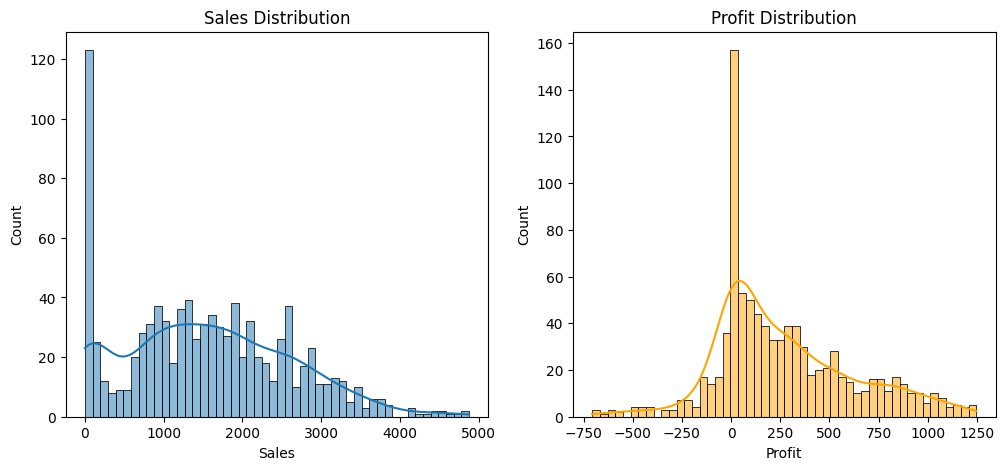

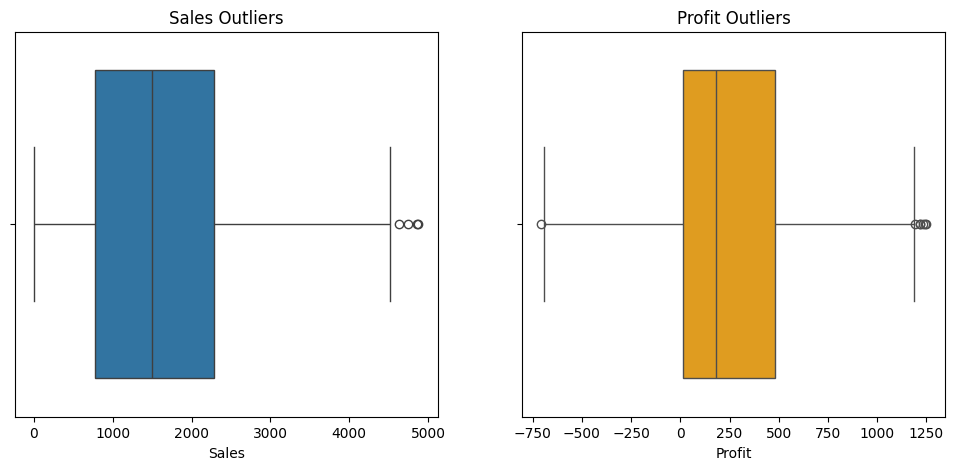

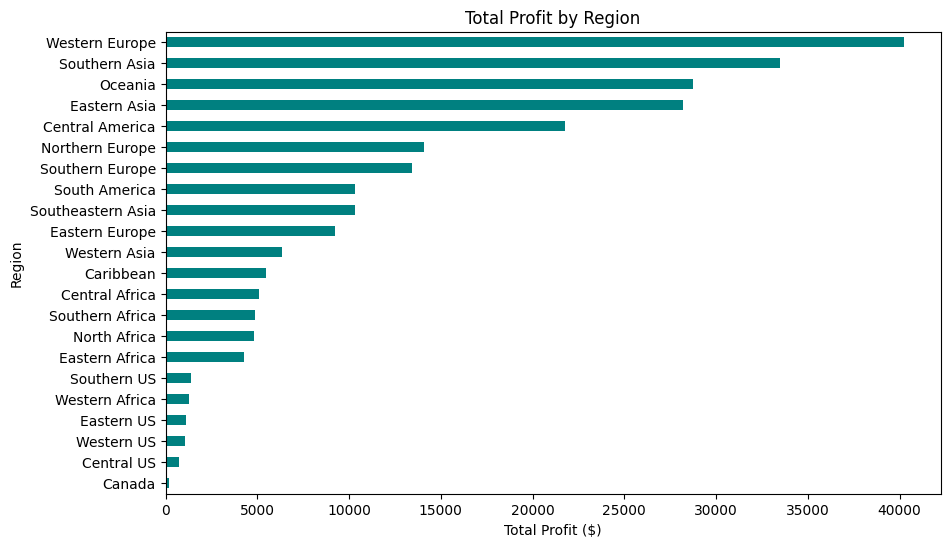

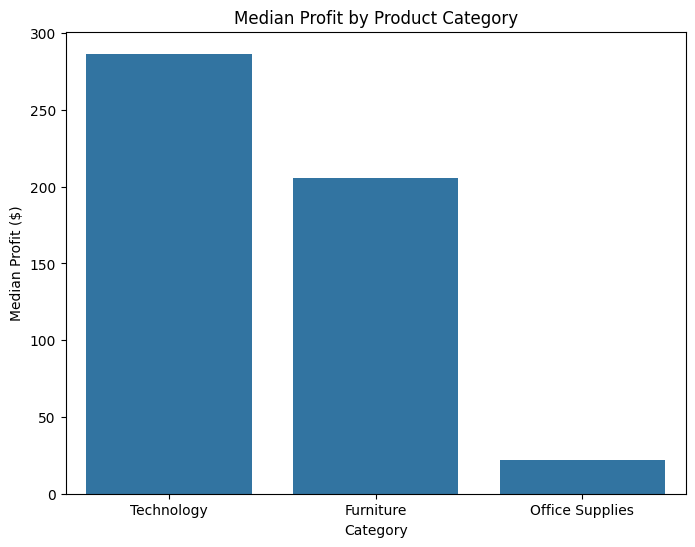

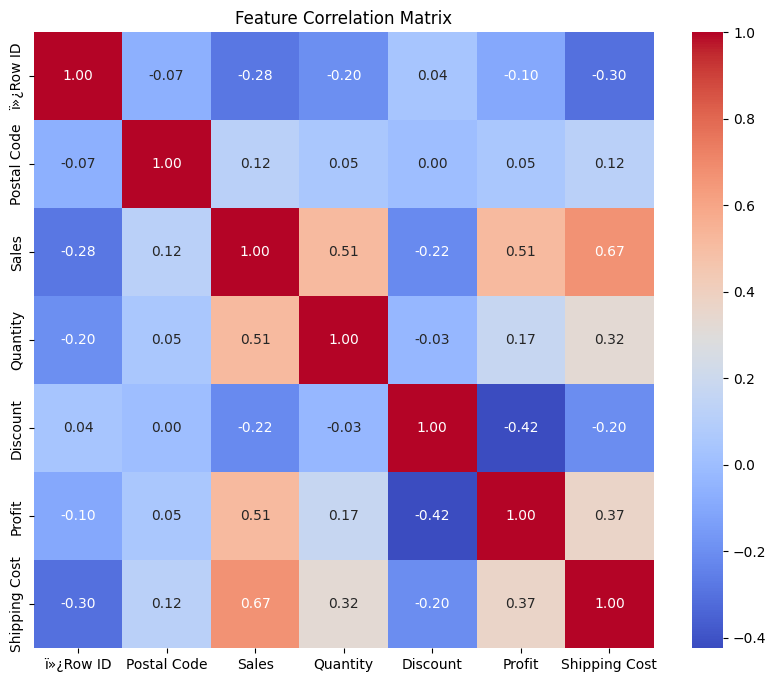

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Global_Superstore.csv", encoding='latin1')  # Handle potential encoding issues

# Preliminary checks
print(f"Shape: {df.shape}\nColumns: {df.columns.tolist()}")
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with 'Unknown'
df['Postal Code'] = df['Postal Code'].fillna('Unknown')

df = df.drop_duplicates()
print("New shape after deduplication:", df.shape)

def handle_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df = handle_outliers('Sales')
df = handle_outliers('Profit')

print(df[['Sales', 'Profit']].describe().round(2))
corr_matrix = df[numeric_cols].corr()
print(corr_matrix[['Sales', 'Profit']].sort_values(by='Profit', ascending=False))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Profit'], bins=50, kde=True, color='orange')
plt.title('Profit Distribution')
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Sales'])
plt.title('Sales Outliers')

plt.subplot(1,2,2)
sns.boxplot(x=df['Profit'], color='orange')
plt.title('Profit Outliers')
plt.show()

plt.figure(figsize=(10,6))
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='barh', color='teal')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit ($)')
plt.show()


plt.figure(figsize=(8,6))
# Updated code using `errorbar=None`
sns.barplot(x='Category', y='Profit', data=df, estimator=np.median, errorbar=None)
plt.title('Median Profit by Product Category')
plt.ylabel('Median Profit ($)')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()